# **1.1. IMPORTING DATASET**

In [113]:
import pandas as pd

In [114]:
ds=pd.read_csv(r"Crude_Oil_Prices.csv")

In [115]:
ds.shape

(2547, 2)

In [116]:
ds.head

<bound method NDFrame.head of             Date  Value
0     29-10-2012  85.54
1     30-10-2012  85.68
2     31-10-2012  86.24
3     01-11-2012  87.09
4     02-11-2012  84.86
...          ...    ...
2542  12-11-2022    NaN
2543  13-11-2022    NaN
2544  14-11-2022    NaN
2545  15-11-2022    NaN
2546  16-11-2022    NaN

[2547 rows x 2 columns]>

# **1.2. IMPORTING LIBRARIES**

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **1.3. HANDLING_MISSING_VALUES**

In [118]:
ds.isnull().sum()


Date      0
Value    21
dtype: int64

In [119]:
hd=ds.dropna()
print(hd)

            Date  Value
0     29-10-2012  85.54
1     30-10-2012  85.68
2     31-10-2012  86.24
3     01-11-2012  87.09
4     02-11-2012  84.86
...          ...    ...
2521  20-10-2022  85.98
2522  21-10-2022  85.05
2523  24-10-2022  84.92
2524  25-10-2022  84.79
2525  26-10-2022  88.05

[2526 rows x 2 columns]


In [120]:
hd.isnull().sum()

Date     0
Value    0
dtype: int64

# **1.4. FEATURE_SCALING**

In [121]:
from sklearn import preprocessing

In [122]:
x = hd.iloc[:, 1:2].values
print ("\nOriginal data values : \n",  x)


Original data values : 
 [[85.54]
 [85.68]
 [86.24]
 ...
 [84.92]
 [84.79]
 [88.05]]


In [123]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_after_min_max_scaler = min_max_scaler.fit_transform(x)
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)


After min max Scaling : 
 [[0.66062503]
 [0.66187012]
 [0.66685047]
 ...
 [0.65511108]
 [0.65395493]
 [0.68294765]]


In [124]:
Standardisation = preprocessing.StandardScaler()
x_after_Standardisation = Standardisation.fit_transform(x)
print ("\nAfter Standardisation : \n", x_after_Standardisation)


After Standardisation : 
 [[0.86576727]
 [0.87197137]
 [0.89678778]
 ...
 [0.83829196]
 [0.83253101]
 [0.97699794]]


# **DATA_VISUALIZATION**

In [125]:
def strtodate(inp):
  import datetime
  return(datetime.datetime.strptime(inp,'%d-%m-%Y'))
hd.Date=hd.Date.apply(strtodate)
print(hd.Date)

0      2012-10-29
1      2012-10-30
2      2012-10-31
3      2012-11-01
4      2012-11-02
          ...    
2521   2022-10-20
2522   2022-10-21
2523   2022-10-24
2524   2022-10-25
2525   2022-10-26
Name: Date, Length: 2526, dtype: datetime64[ns]


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [126]:
DF = pd.DataFrame()
DF['value'] = hd.Value
DF = DF.set_index(hd.Date)
DF

,value
Date,
2012-10-29,85.54
2012-10-30,85.68
2012-10-31,86.24
2012-11-01,87.09
2012-11-02,84.86
...,...
2022-10-20,85.98
2022-10-21,85.05
2022-10-24,84.92


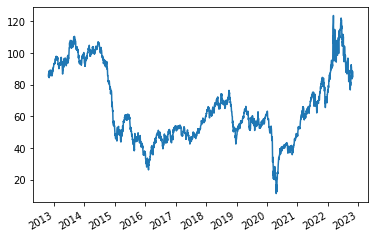

In [127]:
plt.plot(DF)
plt.gcf().autofmt_xdate()
plt.show()